# SALES PREDICTION
    A.Exploratory Data Analysis(EDA)
       1.Loadaing the data 
       2.Data Undrestanding 
       3.Data Cleaning 
       4.Univariate Analysis 
       5.Bivariate Analysis
       6.Multivariate Analysis 
    B.ML Model 
       7.Model Creation 
       8.Model Evaluation aluation


#### importing libraries 

In [1]:
#for preprocessing 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#for prediction 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# A.Exploraly Data Analysis(EDA) ---

## 1.Loadaing the data lysis

In [3]:
import chardet

with open('advertising.csv', 'rb') as f: ## to Specify the correct encoding
    result = chardet.detect(f.read())
charenc = result['encoding']
print(charenc)

data = pd.read_csv('advertising.csv' , encoding=charenc )

data.head()

ascii


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 2.Data Undrestanding 


In [4]:
data.shape

(200, 4)

In [5]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## 3.Data Cleaning 


##### Dropping Nulls 

In [8]:
data.isna().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
###NO Nulls 

## 4.Univariate Analysis 


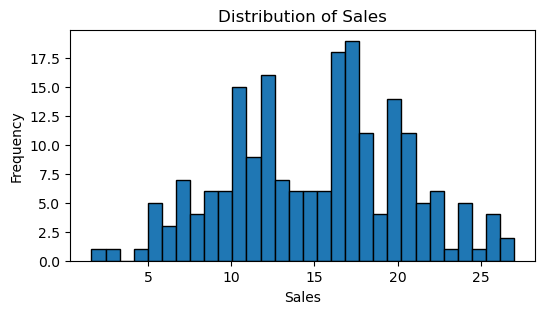

In [10]:
# Distribution of Sales
plt.figure(figsize=(6, 3))
plt.hist(data['Sales'], bins=30, edgecolor='k')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()







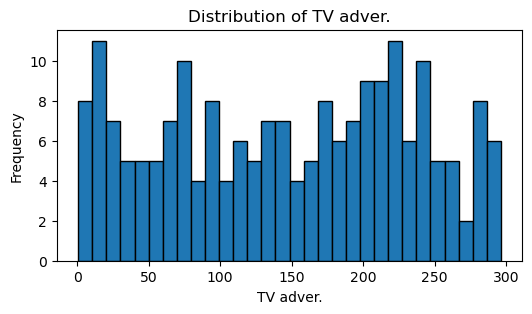

In [15]:
# Distribution of TV adver.
plt.figure(figsize=(6, 3))
plt.hist(data['TV'], bins=30, edgecolor='k')
plt.title('Distribution of TV adver.')
plt.xlabel('TV adver.')
plt.ylabel('Frequency')
plt.show()

## 5.Bivariate Analysis


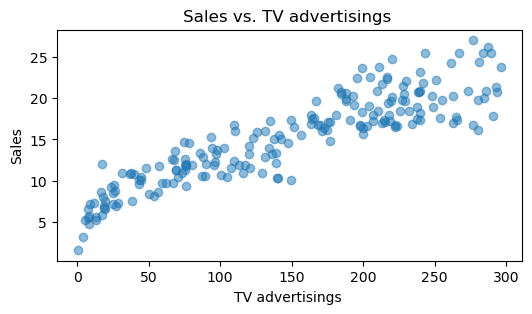

In [17]:
# Relationship between Sales and TV advertisings 
plt.figure(figsize=(6, 3))
plt.scatter(data['TV'], data['Sales'], alpha=0.5)
plt.title('Sales vs. TV advertisings ')
plt.xlabel('TV advertisings ')
plt.ylabel('Sales')
plt.show()






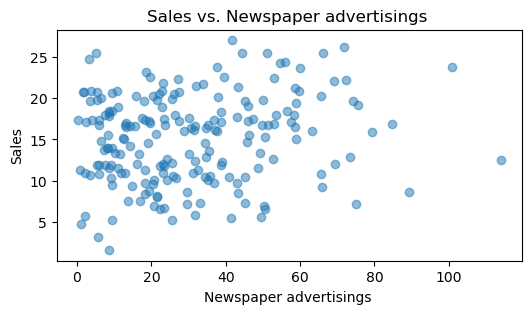

In [24]:
plt.figure(figsize=(6, 3))
plt.scatter(data['Newspaper'], data['Sales'], alpha=0.5)
plt.title('Sales vs. Newspaper advertisings ')
plt.xlabel('Newspaper advertisings ')
plt.ylabel('Sales')
plt.show()

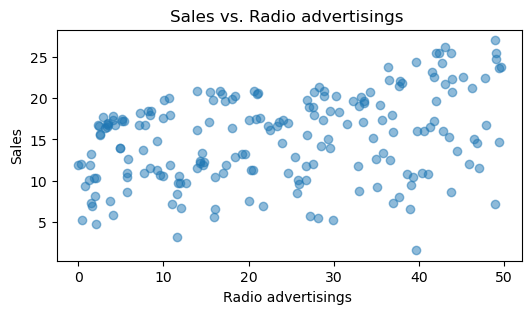

In [25]:
plt.figure(figsize=(6, 3))
plt.scatter(data['Radio'], data['Sales'], alpha=0.5)
plt.title('Sales vs. Radio advertisings ')
plt.xlabel('Radio advertisings ')
plt.ylabel('Sales')
plt.show()

## 6.Multivariate Analysis

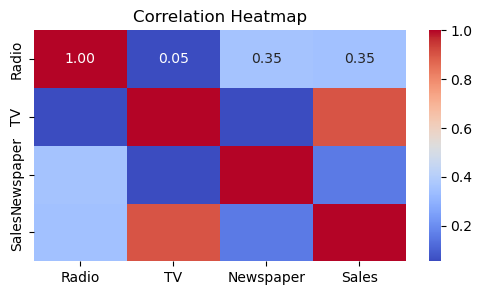

In [26]:
# Select numeric columns for correlation matrix
numeric_cols = ['Radio', 'TV', 'Newspaper' , 'Sales']

# Heatmap of correlations
plt.figure(figsize=(6, 3))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# B.ML Model --- 

## 7.Model Creation 

#### Training 

In [36]:
data.columns 

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [37]:
x = data.drop(columns="Sales")
y = data[["Sales"]]

In [38]:
## devide data into train and test 
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [39]:
x_test.shape

(40, 3)

In [40]:
x_train.shape 

(160, 3)

In [42]:
model = XGBRegressor(objective ='reg:squarederror',gamma=0.09,learning_rate=0.08,subsample=0.7)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.09, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 8.Model Evaluation 

In [43]:
y_pred=model.predict(x_test)


In [44]:
y_pred 

array([16.516335 , 22.71637  , 20.7529   ,  6.2210717, 24.055328 ,
       13.266527 , 23.416906 ,  9.291504 , 16.763195 , 15.848017 ,
        8.40993  ,  9.894262 , 17.442472 ,  3.9714155, 11.120411 ,
       15.918134 ,  3.9604816, 17.396059 , 11.711913 , 19.22481  ,
       19.975681 , 12.952277 ,  9.565145 , 22.453007 , 10.858724 ,
        8.767823 , 23.36945  , 12.848418 , 11.069672 ,  5.8136706,
       16.587376 , 11.466979 , 22.807055 ,  9.01642  , 20.762508 ,
       20.037548 , 12.630786 , 21.043074 , 13.031593 ,  7.0888414],
      dtype=float32)

In [45]:
model.score(x_train,y_train)


0.9982980799813744

In [54]:
model.score(x_test,y_test)


0.9577439594529445